In [1]:
%matplotlib inline

import numpy as np, scipy as sp
from numpy.polynomial import *
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, plot
import ipyvolume

In [14]:
x = np.linspace(-4, 4, 1000)

def gaus(x):
    return np.exp(-x**2/2)

def factory_herm(n):
    f = special.hermitenorm(n)
    def herm(x):
        return f(x)*np.exp(-x**2/2)
    return herm

def factory_instalet(n, w=0.5, norm=True, k=2):
    def subfn(x):
        '''Generate a "Hermitelet" component '''
        return instalet(x, n, w=w, norm=norm, k=k)
    return subfn

# def factory_instalet2(n,m, w=0.5, norm=True, k=2):
#     def subfn(x):
#         '''Generate a "Hermitelet" component '''
#         return instalet(x, n, w=w, norm=norm, k=k)*instalet(x, m, w=w, norm=norm, k=k)
#     return subfn

def instalet(x, n, w=0.5, norm=True, k=2):
    '''x is the domain
    n is the order of the hermitian
    w is the weighting - this is an exponent of the gaussian weighting component
    norm - True: use hermitenorm False: use hermite'''
    hermite = special.hermitenorm if norm else special.hermite
    f = hermite(n)
    g = np.exp(-x**2/k)**w
    return f(x)*g

def orbit(x, r, n, w=True, norm=True, k=2):
    hermite = special.hermitenorm if norm else special.hermite
    f = hermite(n)
    g = np.exp(-r**2/k) if w else 1
    return f(x)*g
    

def sorb(r, n):
    f = special.hermitenorm(n)
    return f(r)*np.exp(-r**2/2)

def test_ortho(fx, gx, x, weight=True, k=2):
    w = np.exp(-x**2/k) if weight else 1
    y1 = fx*gx*w
    q = sp.integrate.cumtrapz(y1)
    return q[-1]

def test_ortho2(fx, gx, x, weight=True, k=2):
    w = np.exp(-x**2/k) if weight else 1
    y1 = np.multiply(fx*gx*w)
    q = sp.integrate.cumtrapz(y1)
    return q[-1]
    
                     

(200, 200)


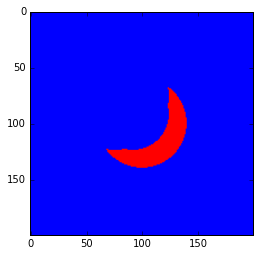

In [61]:
def bananafs(aryshape, outerDia=.4, diaRatio=.8, xy=(0,0)):
   
    mx, my = xy
    n0, n1 = aryshape
    ary = np.zeros(aryshape)
    xx, yy = np.meshgrid(np.linspace(-mx-1, -mx+1, n0), np.linspace(-my-1, -my+1, n1), indexing='xy')

    print(xx.shape)

    rr1 = (xx**2 + yy**2)**0.5

    shift = outerDia - (outerDia * diaRatio)

    mx2, my2 = mx-shift, my-shift
    xx, yy = np.meshgrid(np.linspace(-mx2-1, -mx2+1, n0), np.linspace(-my2-1, -my2+1, n1), indexing='xy')
    rr2 = (xx**2 + yy**2)**0.5

    shiftscale = 3
    mx2, my2 = mx-shiftscale*shift, my-shiftscale*shift
    xx, yy = np.meshgrid(np.linspace(-mx2-1, -mx2+1, n0), np.linspace(-my2-1, -my2+1, n1), indexing='xy')
    rr3 = (xx**2 + yy**2)**0.5

    img = np.bitwise_and(rr1 < outerDia , np.bitwise_not(rr2 < outerDia*diaRatio))
    img = np.bitwise_and(img, ~(rr3 < outerDia*1.2))
    return img
                     
imshow(bananafs((200,200)), cmap='bwr')



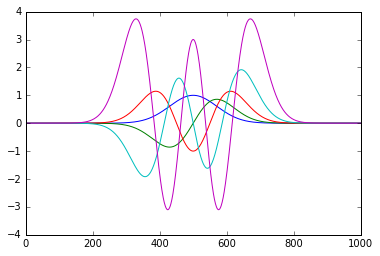

In [6]:
wlets = [factory_instalet(n) for n in range(10)]
x = np.linspace(-10, 10, 1000)
h = [wlet(x) for wlet in wlets]
plot(h[0])
plot(h[1])
plot(h[2])
plot(h[3])
plot(h[4])

In [7]:
test_ortho(h[3], h[7], x, k=2, weight=False)

-1.0257863439709884e-11

In [8]:
xx, yy = np.meshgrid(range(8), range(8))


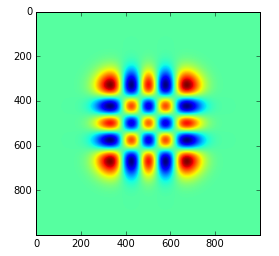

In [9]:
xx, yy = np.meshgrid(x, x)
rr = (xx**2 +yy**2)**0.5
imshow(instalet(xx, 4)*instalet(yy, 4))

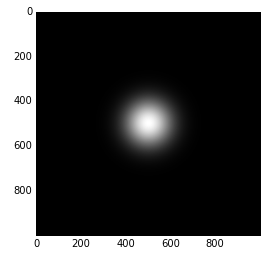

In [10]:
imshow(instalet(rr, 0), cmap='gray')

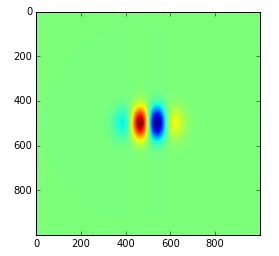

In [15]:
imshow(orbit(xx,rr,3))

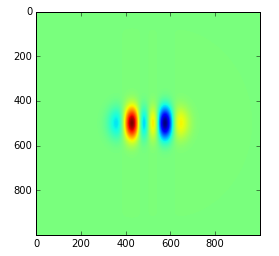

In [16]:
imshow(orbit(xx,rr,4)*instalet(x, 1))

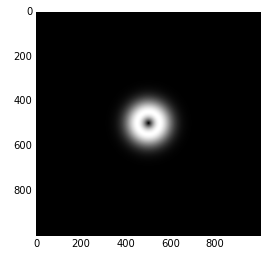

In [17]:
L = 1
imshow(sorb(rr, L), cmap='gray')

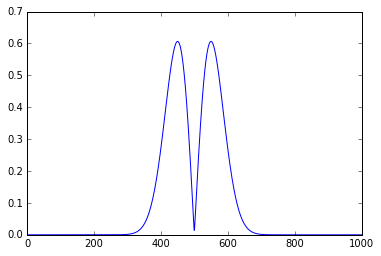

In [18]:
plot(sorb(rr, L)[500])

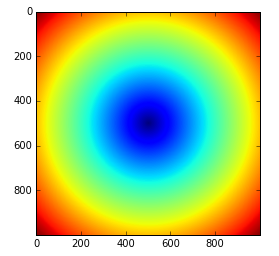

In [19]:
imshow(rr)

/home/mike/ve/ml/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


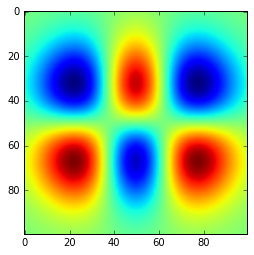

In [20]:
x = np.linspace(-4, 4, 100)
xxx, yyy, zzz = np.meshgrid(x, x, x)
rr = (xxx**2 +yyy**2 + zzz*2)**0.5
vvv = instalet(xxx, 1) * instalet(yyy, 0) *instalet(zzz, 2)
imshow(vvv[50])

In [21]:
m0 = 3
m1 = 8
m2 = 3

vvv = instalet(xxx, m0) * instalet(yyy, m1) *instalet(zzz, m2)
ipyvolume.quickvolshow(vvv, level=[0.13, 0.34, 0.69], opacity=[0.01, 0.05, 0.1])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [22]:
N = 20 # number of harmonics
NX = 1000 # edge size
# Create a field which will establish all of our different harmonics
fns_x = [factory_instalet(n) for n in range(N)]
fns_y = [factory_instalet(n) for n in range(N)]

In [23]:
w23 = factory_instalet2(2,3)

NameError: name 'factory_instalet2' is not defined

In [114]:
bspace = 10
xx, yy = np.meshgrid(np.linspace(-bspace,bspace,NX), np.linspace(-bspace,bspace,NX))

oary = np.array(np.zeros((N,N)), dtype='object')
olist = []
print(oary.shape)
for i in range(N):
    xfn = factory_instalet(i, w=1)
    x = xfn(xx)
    for j in range(N):
        yfn = factory_instalet(j, w=1)
        y = yfn(yy)
        oary[i,j] = x*y 
        olist.append(x*y)

(20, 20)


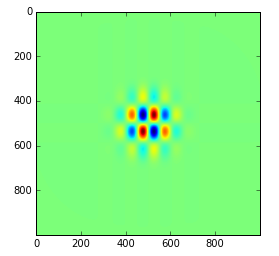

In [115]:
imshow(oary[9,3])

In [116]:
# check for orthogonality. Remember to use a wide enough domain!
þ = oary[1,9]
ñ = oary[9,1]
æ = þ*ñ
np.sum(æ)

6835723.9829928298

In [117]:
æ.shape

(1000, 1000)

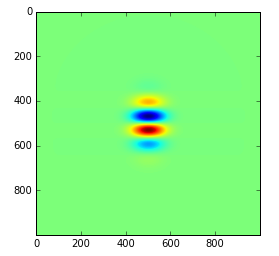

In [118]:
imshow(olist[5])

In [119]:
oary[0,0].shape

(1000, 1000)

(1000, 1000)


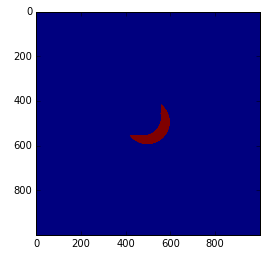

In [120]:
banana = bananafs((1000,1000), outerDia=.2, xy=(-.01,-.01))
imshow(banana)

In [121]:
eigenbanana = [np.dot(banana.ravel(), mask.ravel()) for mask in olist[:400]]
eigenvalues = eigenbanana#[np.sum(ary) for ary in eigenbanana]

In [122]:
eigenbanana[0]

3242.1084732340059

In [123]:
type(eigenbanana[0])
eigenbanana[0].shape

()

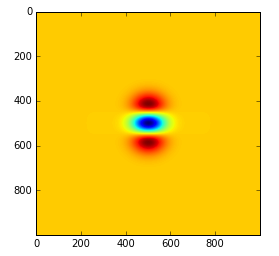

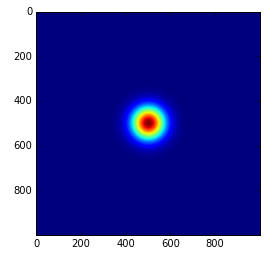

In [124]:
n = 2
imshow(eigenvalues[n]*olist[n])
plt.show()
imshow(olist[0])

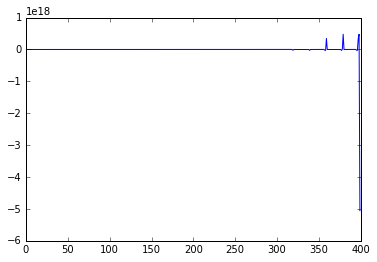

In [125]:
plot(eigenvalues)

In [126]:
eigenbanana[0].shape

()

In [127]:
# imshow(eigenbanana[4], cmap='gray')

In [128]:
eigenvalues2 = np.array(eigenvalues)

In [129]:
def eigenize(values, basisList):
    ary = np.zeros(basisList[0].shape)
    for i in range(len(values)):
        ary += values[i] * basisList[i]
        
    return ary

In [136]:
slc = slice(0, 50)
ary = eigenize(eigenvalues2[slc], olist)

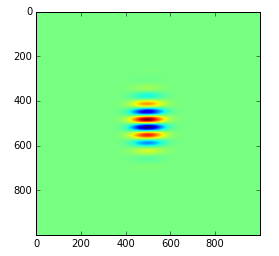

In [137]:
imshow(ary)

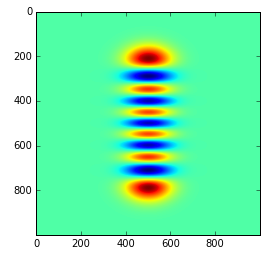

In [112]:
plt.imshow(olist[10])

In [113]:
np.sum(olist[])

29628348.218585867